In [152]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import plotly.express as px
import random
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('../src/'))
from ActivationFunctions import *
from NeuralNetwork import *
from MyUtils import *

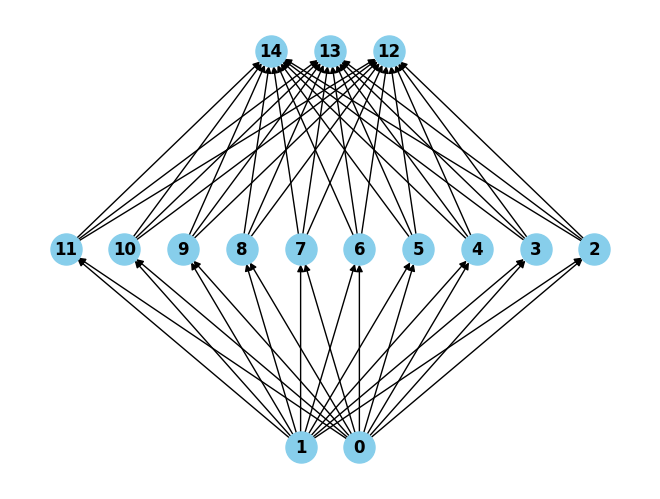

In [153]:
TR_INPUT = 2
TR_OUTPUT = 3
topology = create_stratified_topology([TR_INPUT,10,TR_OUTPUT])
NeuralNetwork.display_topology(topology)

In [154]:
topology

{0: ['input_0', None, [], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
 1: ['input_0', None, [], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
 2: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 3: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 4: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 5: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 6: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 7: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 8: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 9: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 10: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 11: ['hidden_1', 'sigmoid', [1], [12, 13, 14]],
 12: ['output_2', 'identity', [], []],
 13: ['output_2', 'identity', [], []],
 14: ['output_2', 'identity', [], []]}

In [155]:
NN = NeuralNetwork(topology, -0.75, 0.75, True, RANDOM_STATE)

In [156]:
len_dataset = 600
len_training = 500
len_validation = 100

f1 = lambda x : -3*x[0] + x[1] + 3
f2 = lambda x : 3*x[0]**3 - 10*x[1]**2 + 2
f3 = lambda x : 2*math.log(abs(x[0]*5)) - 2*math.log(abs(x[1]*5)) + 1

dummy = create_dataset(len_dataset, TR_INPUT, [-10, 10], 
                      [f1,
                       f2,
                       f3],
                      RANDOM_STATE)

tr_df = dummy[:len_training]
val_df = dummy[-len_validation:]
tr_df.sample(10, random_state=RANDOM_STATE)

,input_1,input_2,output_1,output_2,output_3
272,-5.201397,-4.636844,13.967348,-635.167295,1.229787
244,9.985811,8.259813,-18.697619,2307.002682,1.379526
271,1.156115,2.975372,2.507026,-81.892590,-0.890607
381,5.802449,-8.308424,-22.715772,-102.221193,0.282020
52,-9.454486,-3.390683,27.972774,-2648.300176,3.050916
48,-8.082535,0.103344,27.350947,-1582.138895,9.718804
299,3.815121,0.631849,-7.813514,164.596594,4.596155
452,-4.229787,-3.304836,12.384526,-334.246026,1.493530
295,1.443324,-8.220100,-9.550072,-664.680347,-2.479267
85,-7.726668,0.279925,26.459930,-1382.662462,7.635821


In [157]:
scaler_out = MinMaxScaler()
scaler_in = MinMaxScaler()
scaler_in.fit(tr_df.values[:,:TR_INPUT])
scaler_out.fit(tr_df.values[:,TR_INPUT:])

tr_normalized = np.empty((len_training, TR_OUTPUT+TR_INPUT))
tr_normalized[:,:TR_INPUT] = scaler_in.transform(tr_df.values[:,:TR_INPUT])
tr_normalized[:,TR_INPUT:] = scaler_out.transform(tr_df.values[:,TR_INPUT:])

val_normalized = np.empty((len_validation, TR_OUTPUT+TR_INPUT))
val_normalized[:,:TR_INPUT] = scaler_in.transform(val_df.values[:,:TR_INPUT])
val_normalized[:,TR_INPUT:] = scaler_out.transform(val_df.values[:,TR_INPUT:])

In [158]:
tr_df_normalized = pd.DataFrame(data = tr_normalized, columns=tr_df.columns)
val_df_normalized = pd.DataFrame(data = val_normalized, columns=tr_df.columns)

In [159]:
training_set = tr_df.values
validation_set = val_df.values

batch_size = 5
max_epochs = 2000
error_decrease_tolerance = 0.000001
patience = 20

learning_rate = 0.5/batch_size
lambda_tikhonov = 0
alpha_momentum = 0.5

stats = NN.train(tr_normalized, val_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum)

In [160]:
tr_predictions_normalized = NN.predict_array(tr_normalized[:,:TR_INPUT])
tr_predictions = scaler_out.inverse_transform(tr_predictions_normalized)

In [161]:
pd.options.mode.chained_assignment = None
tr_df[['prediction_1', 'prediction_2', 'prediction_3']] = tr_predictions
for col in ['prediction_1', 'prediction_2', 'prediction_3']:
    tr_df[col + '_err'] = (tr_df[col] - tr_df['output_' + col[-1]])**2
    tr_df[['prediction_1', 'prediction_2', 'prediction_3']] = tr_predictions


tr_df_normalized[['prediction_1', 'prediction_2', 'prediction_3']] = tr_predictions_normalized
for col in ['prediction_1', 'prediction_2', 'prediction_3']:
    tr_df_normalized[col + '_err'] = (tr_df_normalized[col] - tr_df_normalized['output_' + col[-1]])**2
    tr_df_normalized[['prediction_1', 'prediction_2', 'prediction_3']] = tr_predictions_normalized

In [162]:
tr_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,output_1,output_2,output_3,prediction_1,prediction_2,prediction_3,prediction_1_err,prediction_2_err,prediction_3_err
272,-5.201397,-4.636844,13.967348,-635.167295,1.229787,25.900957,-1780.126392,4.749645,142.411040,1.310931e+06,12.389404
244,9.985811,8.259813,-18.697619,2307.002682,1.379526,-13.916067,2102.899315,7.021809,22.863239,4.165818e+04,31.835350
271,1.156115,2.975372,2.507026,-81.892590,-0.890607,23.663755,-1377.504057,6.166970,447.607203,1.678609e+06,49.809396
381,5.802449,-8.308424,-22.715772,-102.221193,0.282020,-8.884973,-629.592792,1.167190,191.290997,2.781208e+05,0.783526
52,-9.454486,-3.390683,27.972774,-2648.300176,3.050916,34.391186,-2024.183386,5.847852,41.196015,3.895218e+05,7.822852


In [163]:
val_predictions_normalized = NN.predict_array(val_normalized[:,:TR_INPUT])
val_predictions = scaler_out.inverse_transform(val_predictions_normalized)

In [164]:
val_df[['prediction_1', 'prediction_2', 'prediction_3']] = val_predictions
for col in ['prediction_1', 'prediction_2', 'prediction_3']:
    val_df[col + '_err'] = (val_df[col] - val_df['output_' + col[-1]])**2
    val_df[['prediction_1', 'prediction_2', 'prediction_3']] = val_predictions

val_df_normalized[['prediction_1', 'prediction_2', 'prediction_3']] = val_predictions_normalized
for col in ['prediction_1', 'prediction_2', 'prediction_3']:
    val_df_normalized[col + '_err'] = (val_df_normalized[col] - val_df_normalized['output_' + col[-1]])**2
    val_df_normalized[['prediction_1', 'prediction_2', 'prediction_3']] = val_predictions_normalized

In [165]:
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,output_1,output_2,output_3,prediction_1,prediction_2,prediction_3,prediction_1_err,prediction_2_err,prediction_3_err
569,-7.350933,4.818153,29.870952,-1421.795733,1.844873,43.371689,-2510.921657,5.190258,182.269907,1.186195e+06,11.191602
533,6.510278,-5.780206,-22.311041,495.681742,1.237886,-3.929072,-685.612027,2.110993,337.896795,1.395455e+06,0.762316
586,-5.258125,7.749377,26.523750,-1034.656297,0.224324,41.501026,-2510.402424,4.363296,224.318788,2.177827e+06,17.131093
560,9.113045,-5.538328,-29.877462,1965.718206,1.996028,-12.802004,-64.365319,2.610204,291.571288,4.121239e+06,0.377212
520,8.312763,5.661057,-16.277231,1404.810487,1.768363,1.153464,269.998395,6.398828,303.829131,1.287798e+06,21.441204


In [166]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 500
minibatch_size : 5
max_epochs : 2000
error_decrease_tolerance : 1e-06
patience : 20
learning_rate : 0.1
lambda_tikhonov : 0
alpha_momentum : 0.5
epochs : 2000


In [167]:
print('last training errors')
print(stats['training_error'][-5:])

last training errors
[0.10246756379888998, 0.10247662946793497, 0.10248567830731098, 0.10249471036038026, 0.10250372567217932]


In [168]:
print('last validation errors')
print(stats['validation_error'][-5:])

last validation errors
[0.10244593007450412, 0.102455018693521, 0.10246409096941748, 0.10247314694531263, 0.10248218666601483]


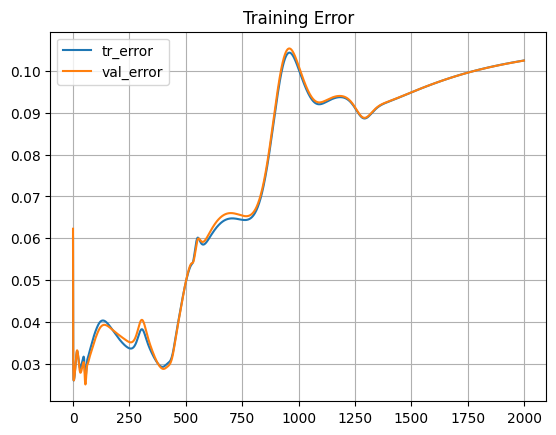

In [169]:
multy_plot([stats['training_error'], stats['validation_error']], ['tr_error', 'val_error'], 'Training Error')

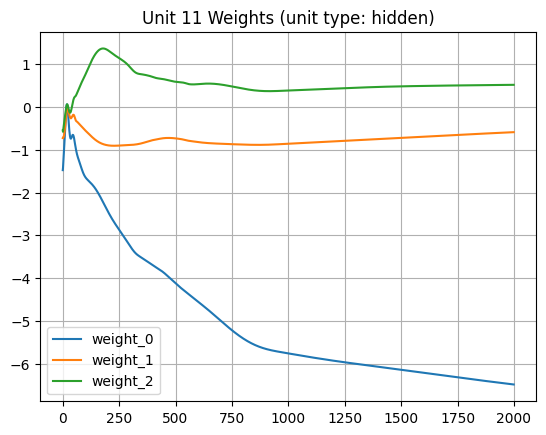

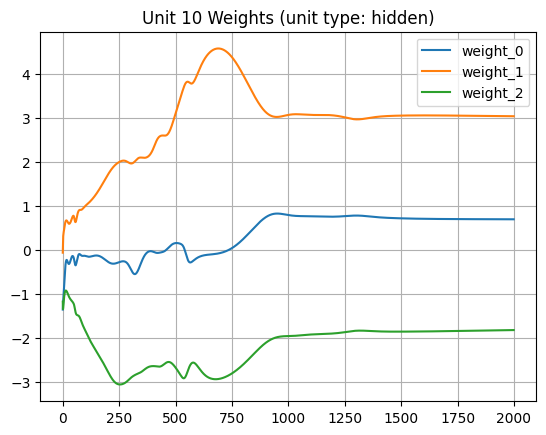

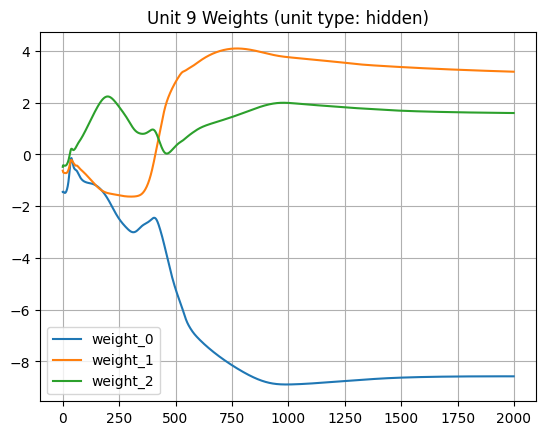

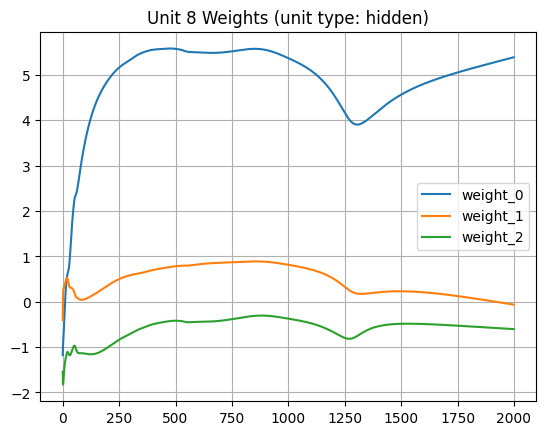

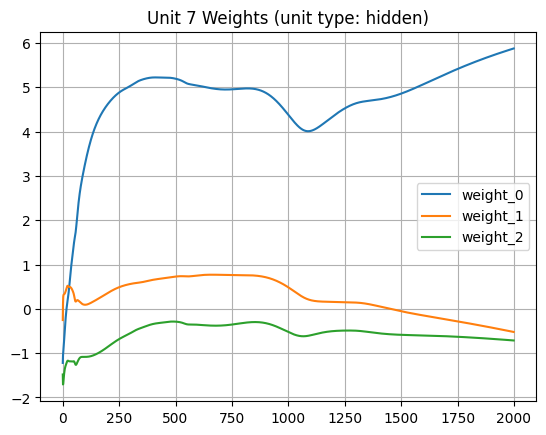

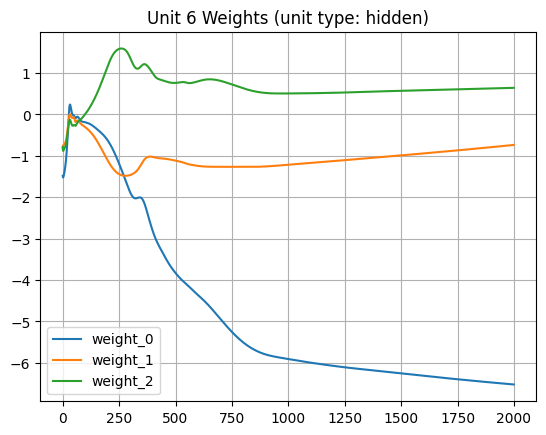

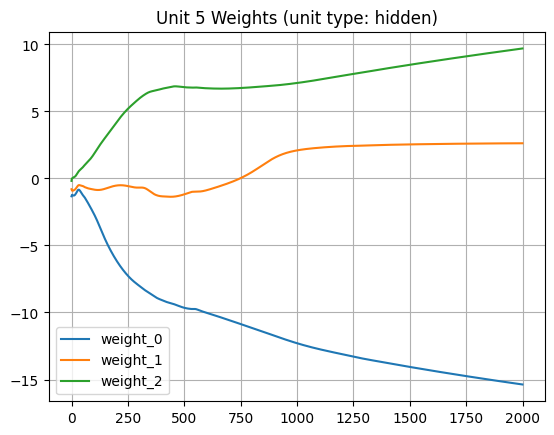

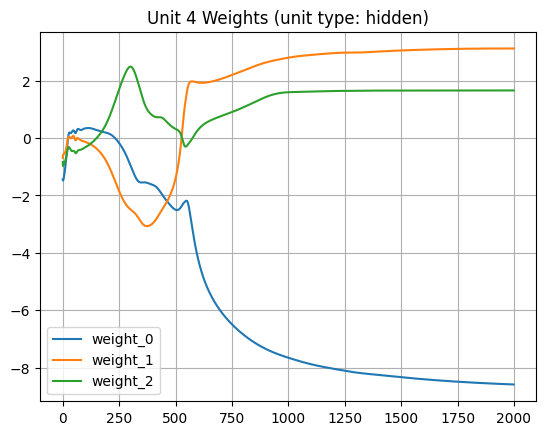

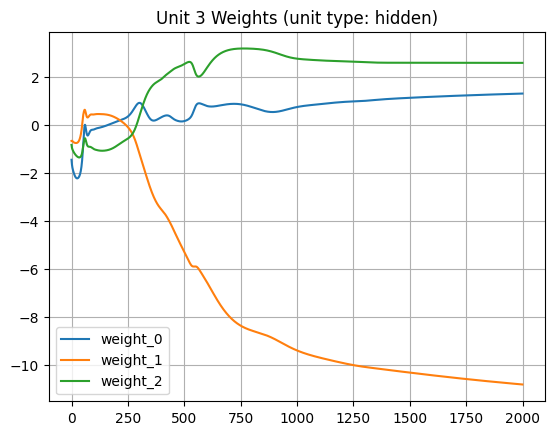

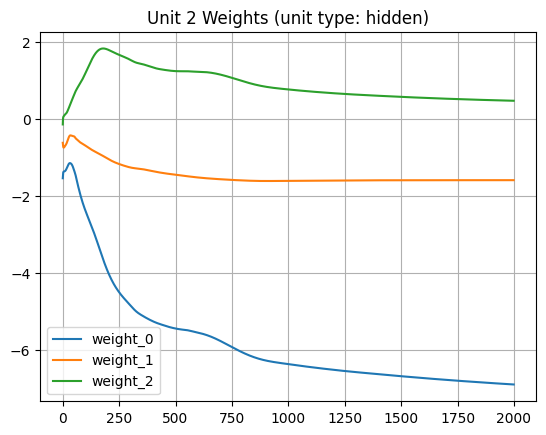

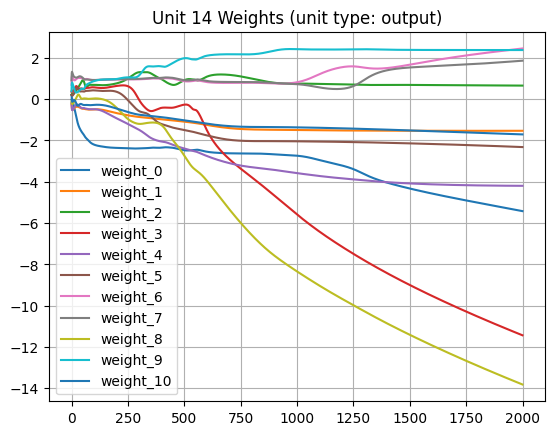

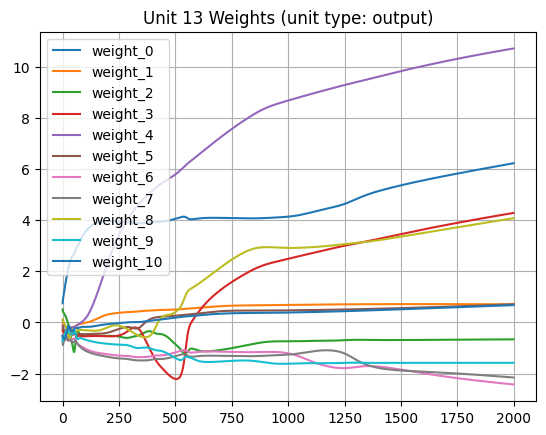

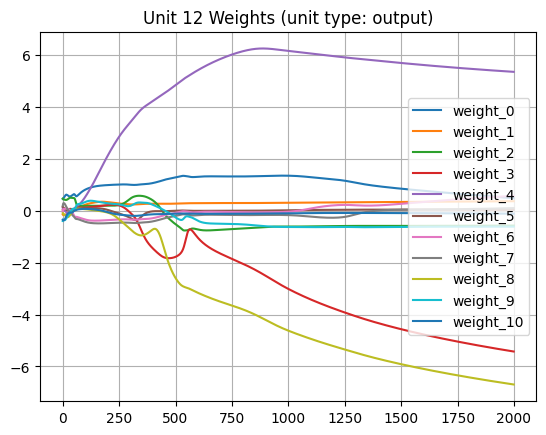

In [170]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

In [171]:
tr_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,output_1,output_2,output_3,prediction_1,prediction_2,prediction_3,prediction_1_err,prediction_2_err,prediction_3_err
272,-5.201397,-4.636844,13.967348,-635.167295,1.229787,25.900957,-1780.126392,4.749645,142.411040,1.310931e+06,12.389404
244,9.985811,8.259813,-18.697619,2307.002682,1.379526,-13.916067,2102.899315,7.021809,22.863239,4.165818e+04,31.835350
271,1.156115,2.975372,2.507026,-81.892590,-0.890607,23.663755,-1377.504057,6.166970,447.607203,1.678609e+06,49.809396
381,5.802449,-8.308424,-22.715772,-102.221193,0.282020,-8.884973,-629.592792,1.167190,191.290997,2.781208e+05,0.783526
52,-9.454486,-3.390683,27.972774,-2648.300176,3.050916,34.391186,-2024.183386,5.847852,41.196015,3.895218e+05,7.822852


In [172]:
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,output_1,output_2,output_3,prediction_1,prediction_2,prediction_3,prediction_1_err,prediction_2_err,prediction_3_err
569,-7.350933,4.818153,29.870952,-1421.795733,1.844873,43.371689,-2510.921657,5.190258,182.269907,1.186195e+06,11.191602
533,6.510278,-5.780206,-22.311041,495.681742,1.237886,-3.929072,-685.612027,2.110993,337.896795,1.395455e+06,0.762316
586,-5.258125,7.749377,26.523750,-1034.656297,0.224324,41.501026,-2510.402424,4.363296,224.318788,2.177827e+06,17.131093
560,9.113045,-5.538328,-29.877462,1965.718206,1.996028,-12.802004,-64.365319,2.610204,291.571288,4.121239e+06,0.377212
520,8.312763,5.661057,-16.277231,1404.810487,1.768363,1.153464,269.998395,6.398828,303.829131,1.287798e+06,21.441204


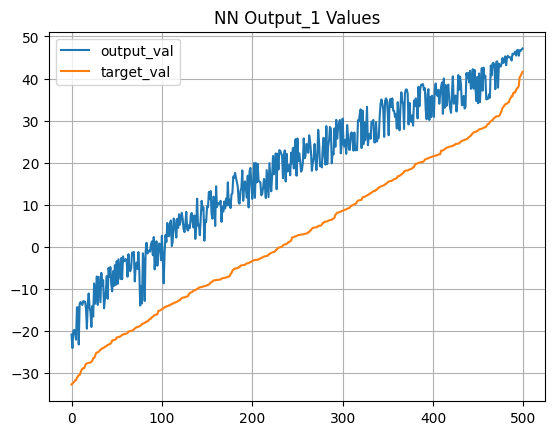

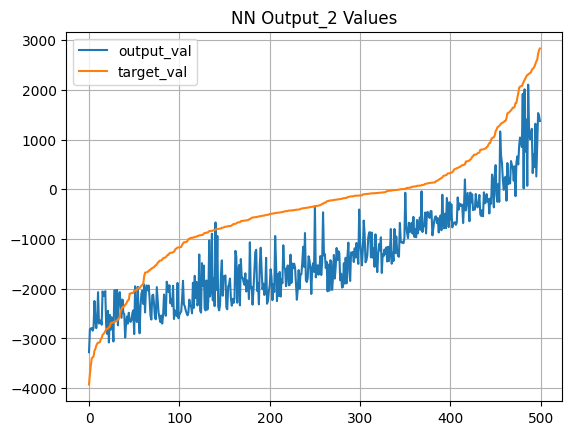

In [173]:
for i in range(TR_INPUT):
    sorted_order = training_set[:, TR_INPUT + i].argsort()
    multy_plot([tr_predictions[sorted_order][:,i] , training_set[sorted_order][:,TR_INPUT + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

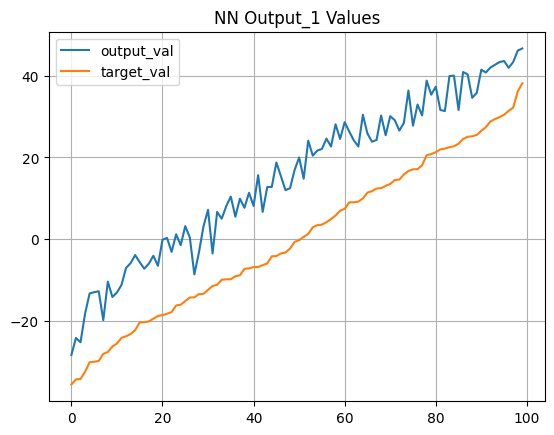

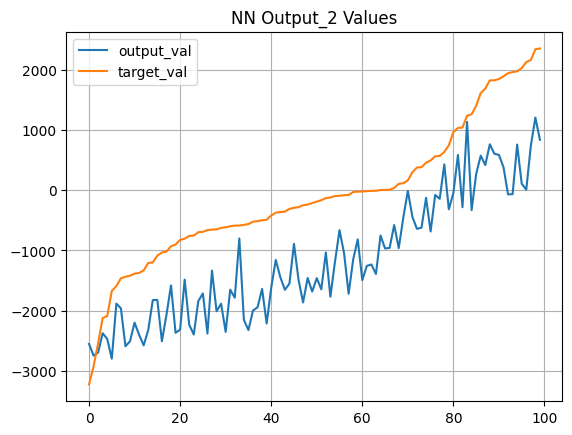

In [174]:
for i in range(TR_INPUT):
    sorted_order = validation_set[:, TR_INPUT + i].argsort()
    multy_plot([val_predictions[sorted_order][:,i] , validation_set[sorted_order][:,TR_INPUT + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

Tot points: 500


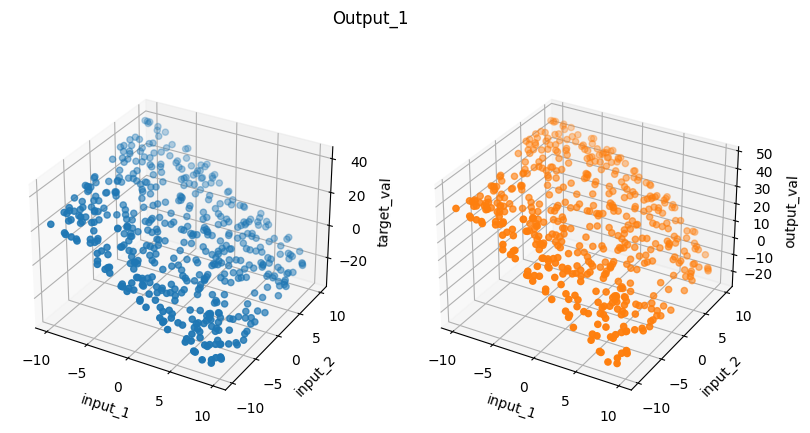

In [175]:
multy_plot_3d([training_set[:,0], training_set[:,0]], 
              [training_set[:,1], training_set[:,1]],
              [training_set[:,TR_INPUT], tr_predictions[:,0]],
              [['input_1', 'input_2', 'target_val'], ['input_1', 'input_2', 'output_val']],
              'Output_1');

Tot points: 500


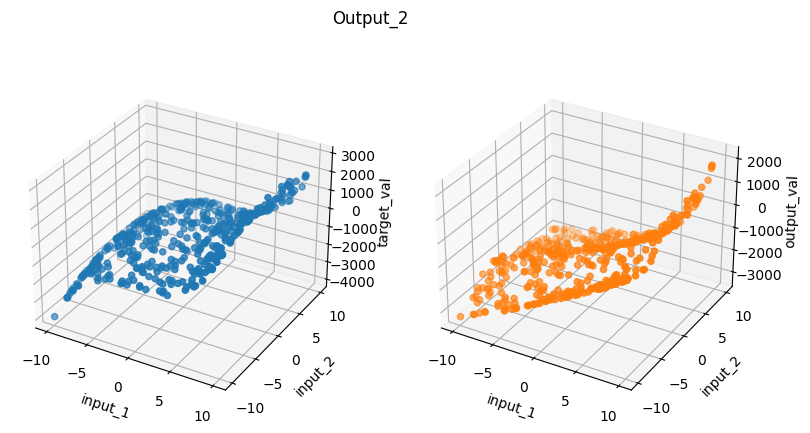

In [176]:
multy_plot_3d([training_set[:,0], training_set[:,0]], 
              [training_set[:,1], training_set[:,1]],
              [training_set[:,TR_INPUT + 1], tr_predictions[:,1]],
              [['input_1', 'input_2', 'target_val'], ['input_1', 'input_2', 'output_val']],
              'Output_2');

Tot points: 500


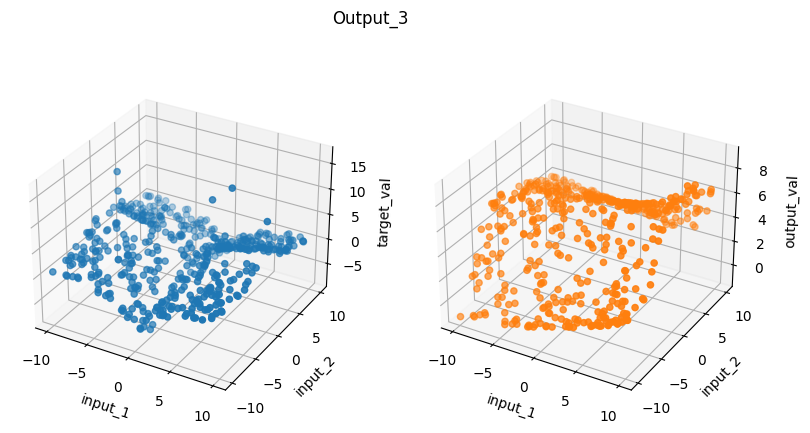

In [177]:
multy_plot_3d([training_set[:,0], training_set[:,0]], 
              [training_set[:,1], training_set[:,1]],
              [training_set[:,TR_INPUT + 2], tr_predictions[:,2]],
              [['input_1', 'input_2', 'target_val'], ['input_1', 'input_2', 'output_val']],
              'Output_3');

In [178]:
interactive_3d_plot(tr_df_normalized, 'input_1', 'input_2', 'prediction_2', 'prediction_2_err')

Tot points: 500


In [179]:
interactive_3d_plot(tr_df_normalized, 'input_1', 'input_2', 'output_2', 'prediction_2_err')

Tot points: 500


In [180]:
interactive_3d_plot(val_df_normalized, 'input_1', 'input_2', 'prediction_2', 'prediction_2_err')

Tot points: 100


In [181]:
interactive_3d_plot(val_df_normalized, 'input_1', 'input_2', 'output_2', 'prediction_2_err')

Tot points: 100
